### Import Modules, Change Directory, Set Variables

In [1]:
import_dir = 'data/filtered data'
export_dir = 'graphs'

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from datetime import date
import numpy as np

In [4]:
files = os.listdir(import_dir)
tsv_files = [f for f in files if f.endswith('sv')]
print(f"{'-'*5} {os.path.split(import_dir)[-1]} {'-'*5}" )
print(*[f'{i}: {f}' for i, f in enumerate(tsv_files)][:10], sep='\n')

----- filtered data -----
0: LAKELAND_through_window_3_20200114.tsv


In [5]:
import_n = 0

### Import

In [16]:
df = pd.read_csv(os.path.join(import_dir,tsv_files[import_n]), sep='\t',index_col='sessID')
print(df.shape)
df.head()

(17116, 651)


,lvl0_EventCount,lvl0_ActiveEventCount,lvl0_durationInSecs,lvl0_count_gamestate_logs,lvl0_count_achievements,lvl0_count_buy_home,lvl0_count_buy_food,lvl0_count_buy_farm,lvl0_count_buy_fertilizer,lvl0_count_buy_livestock,...,sess_ActiveEventCount,continue,language,audio,fullscreen,version,debug,num_play,persistentSessionID,sessDuration
sessID,,,,,,,,,,,,,,,,,,,,,
19110002150060536,133,77.0,NaN,4.0,2.0,1.0,1.0,1.0,1.0,NaN,...,197,0,english,1,0,15,0,1,19110002150060536,705.210
19110007194177108,91,51.0,NaN,3.0,2.0,1.0,1.0,1.0,NaN,NaN,...,149,0,english,1,0,15,0,1,19110007194177108,674.433
19110007194177108,184,50.0,NaN,10.0,5.0,2.0,4.0,NaN,NaN,NaN,...,50,1,english,1,0,15,0,2,19110007194177108,246.690
19110008292229944,118,37.0,NaN,6.0,2.0,1.0,1.0,2.0,1.0,1.0,...,150,0,english,1,0,15,0,1,19110008292229944,857.575
19110008450097140,272,42.0,NaN,7.0,4.0,NaN,NaN,1.0,4.0,1.0,...,65,1,english,1,0,15,0,1,19100309270560400,677.492


In [17]:
list(df.columns)

['lvl0_EventCount',
 'lvl0_ActiveEventCount',
 'lvl0_durationInSecs',
 'lvl0_count_gamestate_logs',
 'lvl0_count_achievements',
 'lvl0_count_buy_home',
 'lvl0_count_buy_food',
 'lvl0_count_buy_farm',
 'lvl0_count_buy_fertilizer',
 'lvl0_count_buy_livestock',
 'lvl0_count_buy_skimmer',
 'lvl0_count_buy_sign',
 'lvl0_count_buy_road',
 'lvl0_money_spent',
 'lvl0_money_spent_home',
 'lvl0_money_spent_food',
 'lvl0_money_spent_farm',
 'lvl0_money_spent_fertilizer',
 'lvl0_money_spent_livestock',
 'lvl0_money_spent_skimmer',
 'lvl0_money_spent_sign',
 'lvl0_money_spent_road',
 'lvl0_min_num_home_in_play',
 'lvl0_max_num_home_in_play',
 'lvl0_min_num_food_in_play',
 'lvl0_max_num_food_in_play',
 'lvl0_min_num_farm_in_play',
 'lvl0_max_num_farm_in_play',
 'lvl0_min_num_fertilizer_in_play',
 'lvl0_max_num_fertilizer_in_play',
 'lvl0_min_num_livestock_in_play',
 'lvl0_max_num_livestock_in_play',
 'lvl0_min_num_skimmer_in_play',
 'lvl0_max_num_skimmer_in_play',
 'lvl0_min_num_sign_in_play',
 'lvl

### Drop Continues

In [20]:
df = df.drop(df[df['continue'] == 1].index)
print(df.shape)
df.head()

(8850, 651)


,lvl0_EventCount,lvl0_ActiveEventCount,lvl0_durationInSecs,lvl0_count_gamestate_logs,lvl0_count_achievements,lvl0_count_buy_home,lvl0_count_buy_food,lvl0_count_buy_farm,lvl0_count_buy_fertilizer,lvl0_count_buy_livestock,...,sess_ActiveEventCount,continue,language,audio,fullscreen,version,debug,num_play,persistentSessionID,sessDuration
sessID,,,,,,,,,,,,,,,,,,,,,
19110002150060536,133,77.0,NaN,4.0,2.0,1.0,1.0,1.0,1.0,NaN,...,197,0,english,1,0,15,0,1,19110002150060536,705.210
19110008292229944,118,37.0,NaN,6.0,2.0,1.0,1.0,2.0,1.0,1.0,...,150,0,english,1,0,15,0,1,19110008292229944,857.575
19110009492236160,69,29.0,NaN,3.0,2.0,1.0,1.0,1.0,NaN,NaN,...,187,0,english,1,0,15,0,1,19110009492236160,1416.345
19110010164029110,50,16.0,NaN,3.0,2.0,1.0,1.0,1.0,NaN,NaN,...,65,0,english,1,1,15,0,1,19110010164029110,789.959
19110010481226510,139,44.0,NaN,5.0,3.0,1.0,1.0,1.0,2.0,NaN,...,144,0,english,1,0,15,0,1,19090618515744880,935.284


In [21]:
def output_level_histogram(fname_base, xlabel, **kwargs):
    # set parameters
    output_file = os.path.join('jowilder_graphs', f'{date.today().strftime("%Y%m%d")}_{fname_base}.jpg')
    aggregate_fname = kwargs.get("aggregate_fname") or 'sess_'+fname_base
    xlim = kwargs.get("xlim") or None
    agg_xlim = kwargs.get("agg_xlim") or None
    zscore_cutoff = kwargs.get("zscore_cutoff") or 3
    max_x = kwargs.get("max_x") or None
    max_x_agg = kwargs.get("max_x_agg") or  None
    params = {"Max zscore kept (others data points thrown out as outliers)": zscore_cutoff,
            "Max X value kept - Level": max_x,
            "Max X value kept - Aggregate": max_x_agg,
            "Graph right cutoff - Level": xlim,
            "Graph right cutoff -  Aggregate": agg_xlim
             }
    lvl_range = range(23)


    # drop if NA for any
    feat_col_names = [f'lvl{lvl}_{fname_base}' for lvl in lvl_range] + [f'sess_words_per_second']
    hist_df = df.dropna(subset=feat_col_names)
    
    def get_histogram_level_feat(fname_base, lvl,max_x=None):
        get_histogram_feat(f'lvl{lvl}_{fname_base}',f'Level {lvl}',max_x=max_x)
                               
    def get_histogram_feat(fname,title,max_x=None):                           
        feat_df = hist_df[[fname]]
        if max_x:
            feat_df = feat_df[feat_df[fname] <= max_x]
        feat_df_no_outliers = feat_df[(np.abs(stats.zscore(feat_df)) < zscore_cutoff).all(axis=1)]
        feat_list = list((feat_df_no_outliers)[fname])
                               
        plt.xlabel(xlabel)
        plt.title(title)
        plt.ylabel(f'number of players (n={len(feat_list)})')
        plt.hist(feat_list, bins=30)

    fig = plt.figure(figsize=(10,30),dpi=160)
    fig.suptitle(fname_base,fontsize=24)
    fig.subplots_adjust(hspace=0.6, wspace=0.4)
    for i in lvl_range:
        fig.add_subplot(13,2,i+1)
        get_histogram_level_feat(fname_base,i,max_x=max_x)
        if xlim:
            plt.xlim((0,xlim))
    fig.add_subplot(10,2,20)
    get_histogram_feat(aggregate_fname, 'Aggregate',max_x=max_x_agg)
    if agg_xlim:
        plt.xlim((0,agg_xlim))
                               
    plt.tight_layout(rect=[0,0.03,1,0.95])
    arg_string = "\n".join(f"{k}: {v}" for k,v in params.items() if v)
    fig.text(.03,.95,f'Generated on {date.today().strftime("%m/%d/%Y")}.\n{arg_string}')
    plt.show()
    fig.savefig(output_file)
                               
output_level_histogram('count_notebook_uses','number of notebook uses',zscore_cutoff=6)
    

KeyError: ['lvl0_count_notebook_uses', 'lvl1_count_notebook_uses', 'lvl2_count_notebook_uses', 'lvl3_count_notebook_uses', 'lvl4_count_notebook_uses', 'lvl5_count_notebook_uses', 'lvl6_count_notebook_uses', 'lvl7_count_notebook_uses', 'lvl8_count_notebook_uses', 'lvl9_count_notebook_uses', 'lvl10_count_notebook_uses', 'lvl11_count_notebook_uses', 'lvl12_count_notebook_uses', 'lvl13_count_notebook_uses', 'lvl14_count_notebook_uses', 'lvl15_count_notebook_uses', 'lvl16_count_notebook_uses', 'lvl17_count_notebook_uses', 'lvl18_count_notebook_uses', 'lvl19_count_notebook_uses', 'lvl20_count_notebook_uses', 'lvl21_count_notebook_uses', 'lvl22_count_notebook_uses', 'sess_words_per_second']

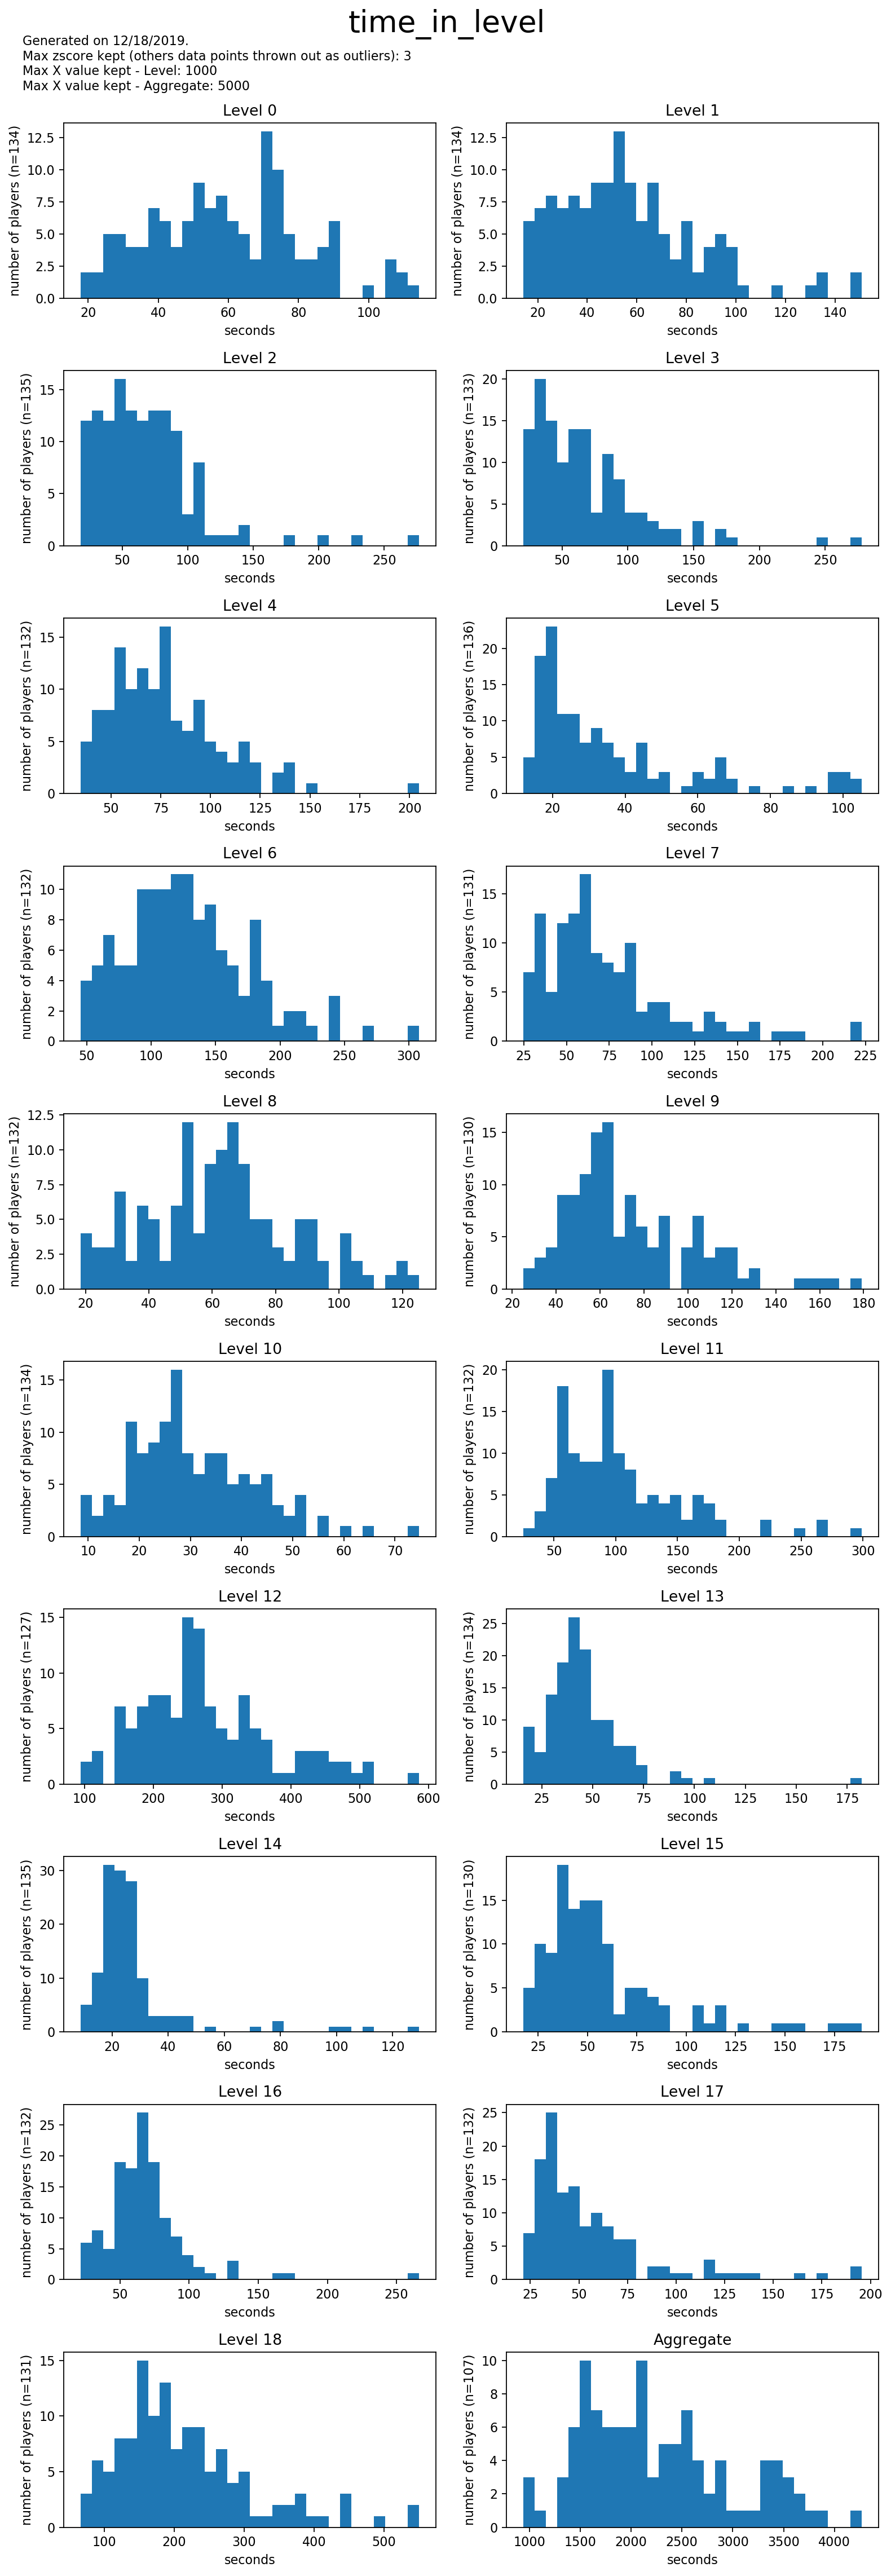

In [63]:
output_level_histogram('time_in_level','seconds',aggregate_fname='sessDuration',max_x=1000, max_x_agg=5000)

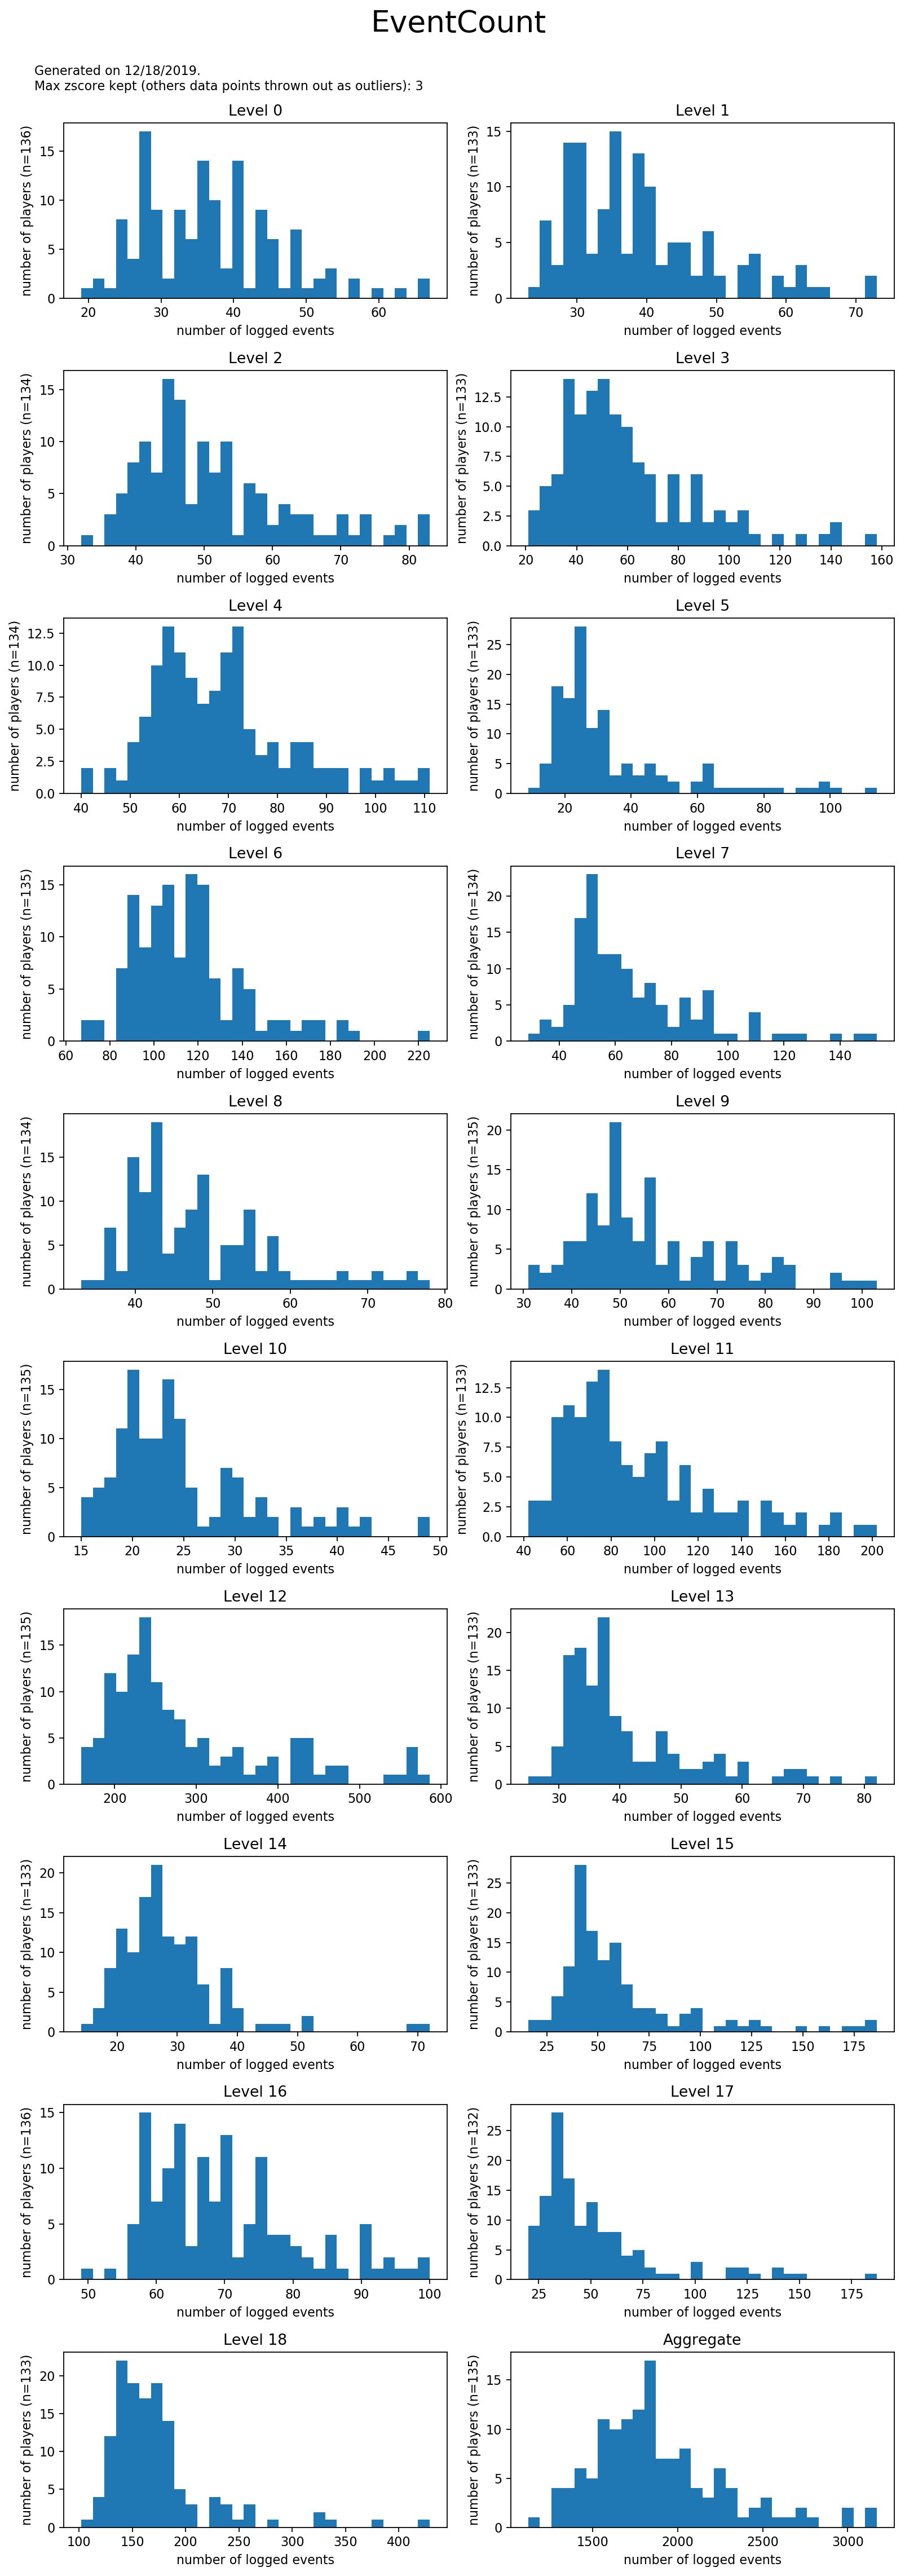

In [64]:
output_level_histogram('EventCount','number of logged events')

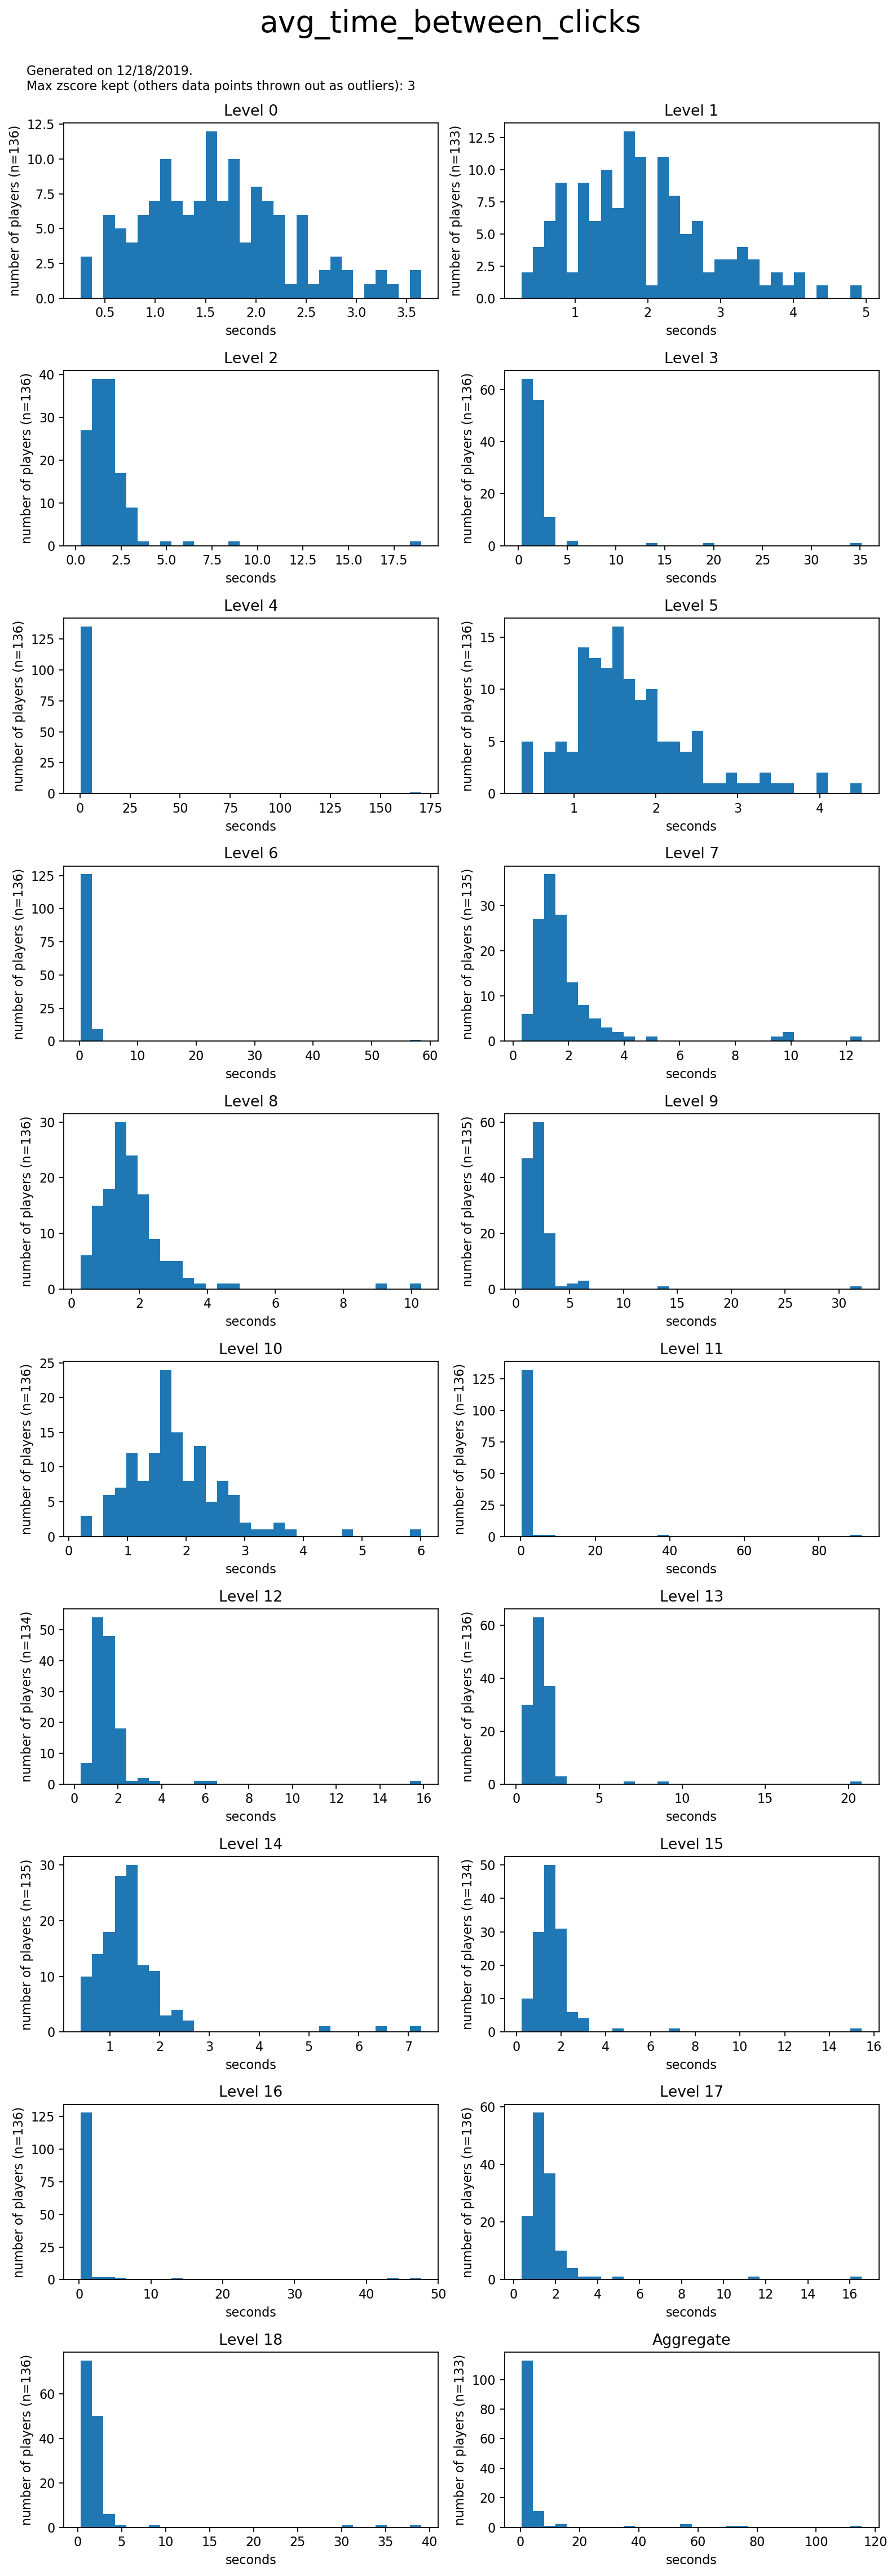

In [65]:
output_level_histogram('avg_time_between_clicks', 'seconds')

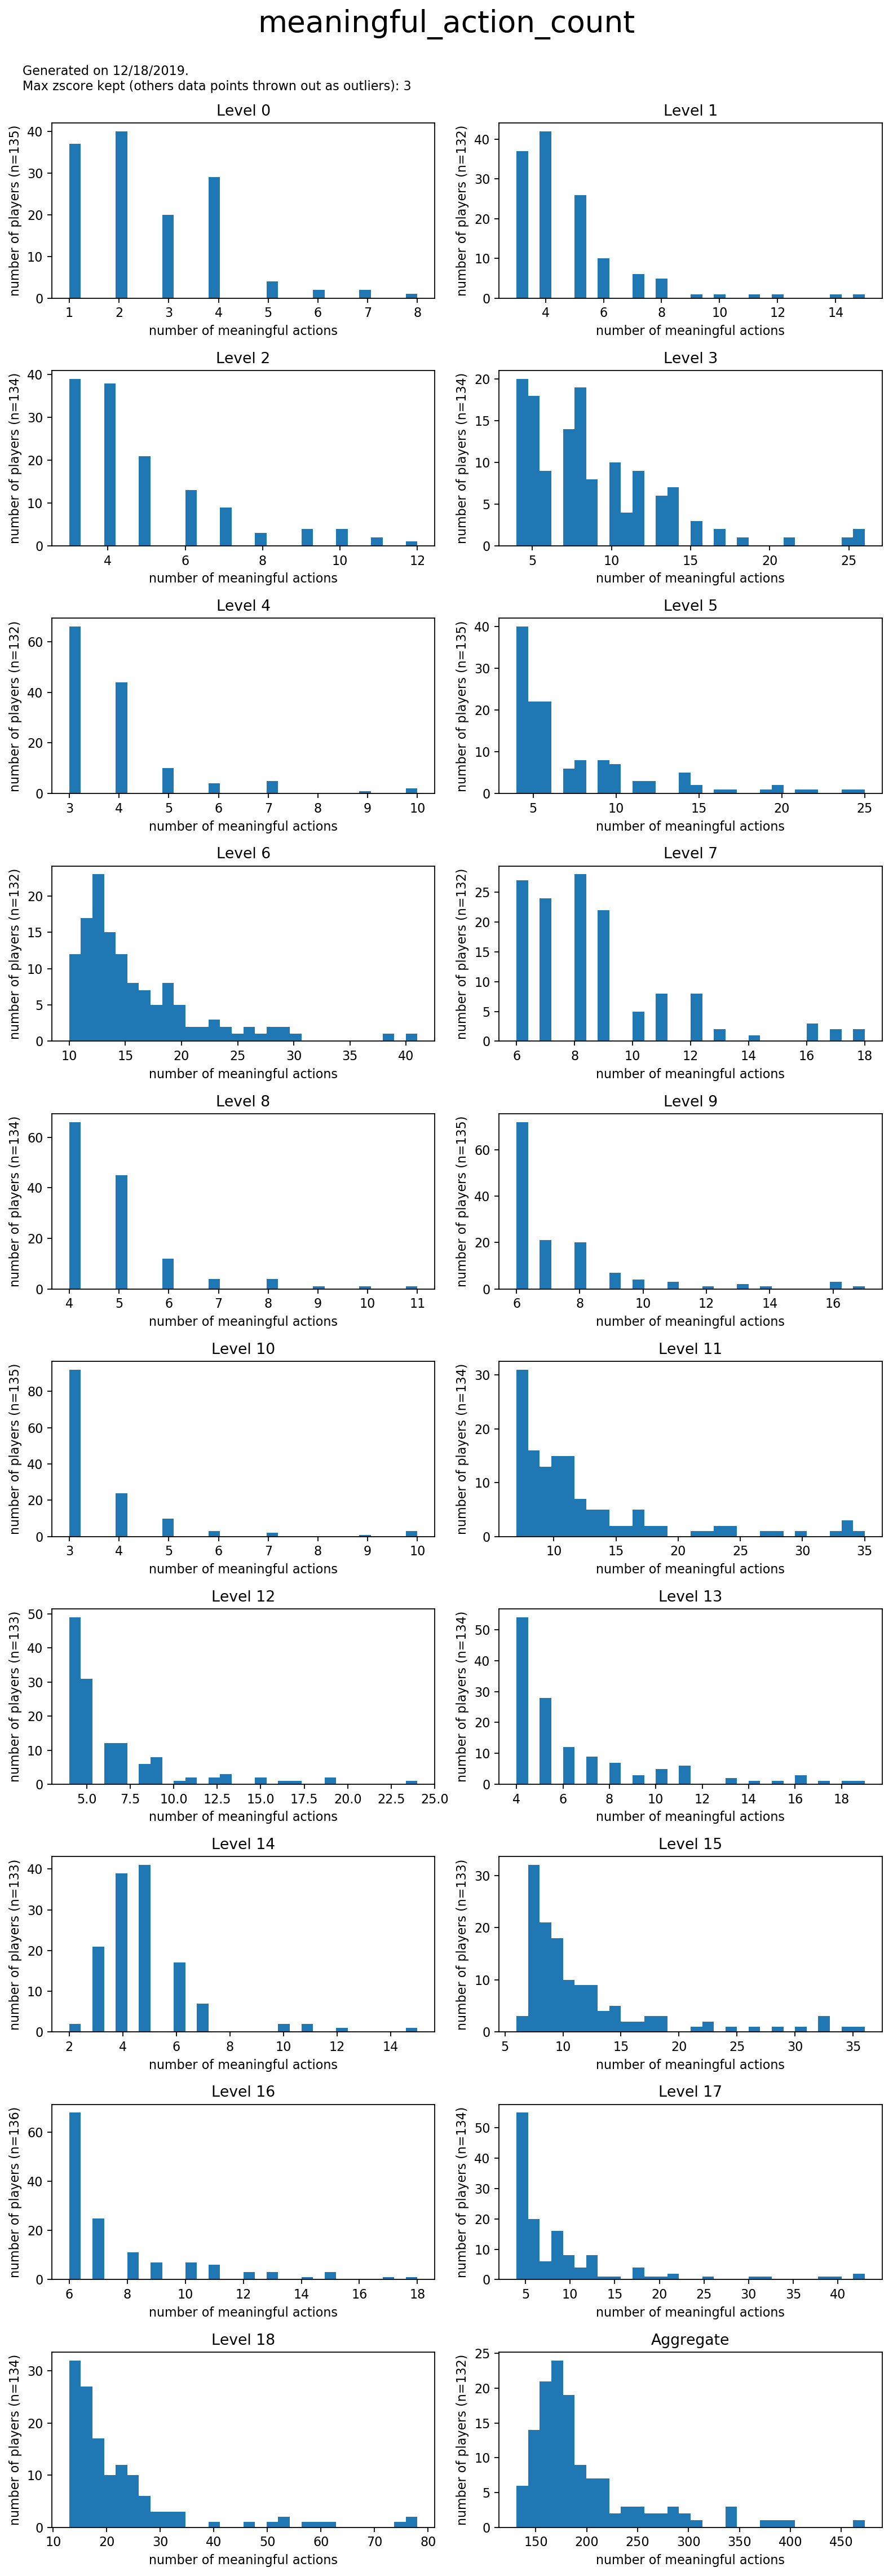

In [66]:
output_level_histogram('meaningful_action_count', 'number of meaningful actions')

/Users/johnmccloskey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in less


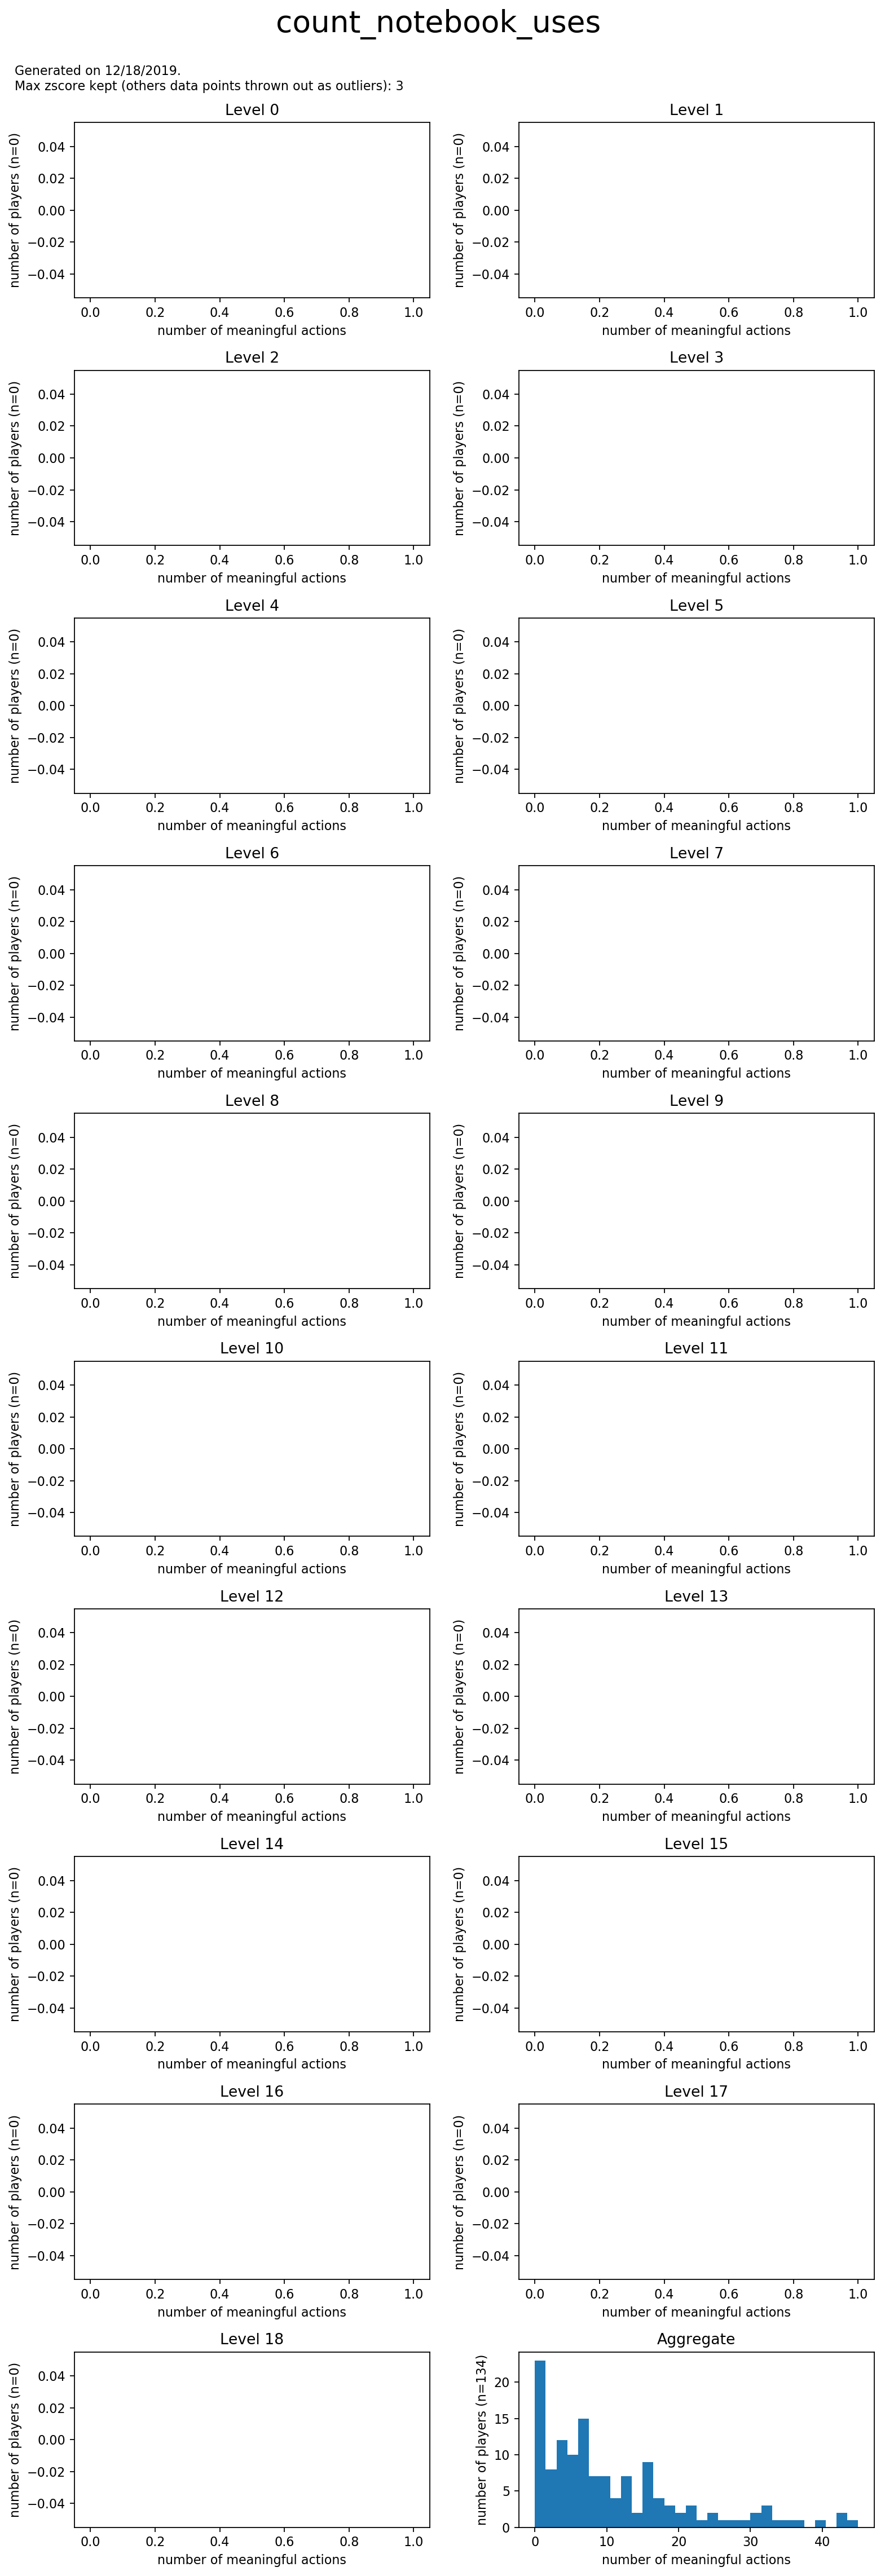

In [75]:
output_level_histogram('count_notebook_uses', 'number of meaningful actions')